In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
x, y = fetch_california_housing(return_X_y=True, as_frame = True)
df = pd.concat([x,y], axis = 1)

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


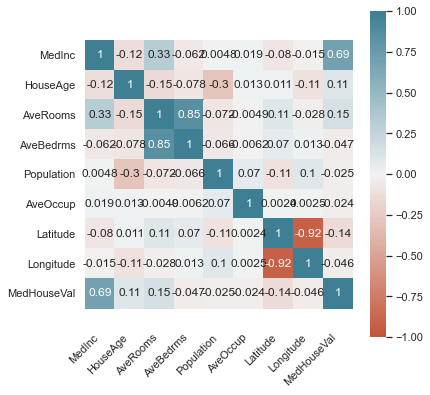

In [6]:
# CORRELATIONS 
corr = df.corr()

plt.figure(figsize=(6, 6))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [7]:
def prep_serie(df,col):
    f = df[col]
    qs = f.quantile(q=0.05)
    qb = f.quantile(q=0.95)
    f.to_numpy()
    f = f[f > qs]
    f = f[f < qb]
    return f

<Figure size 864x864 with 0 Axes>

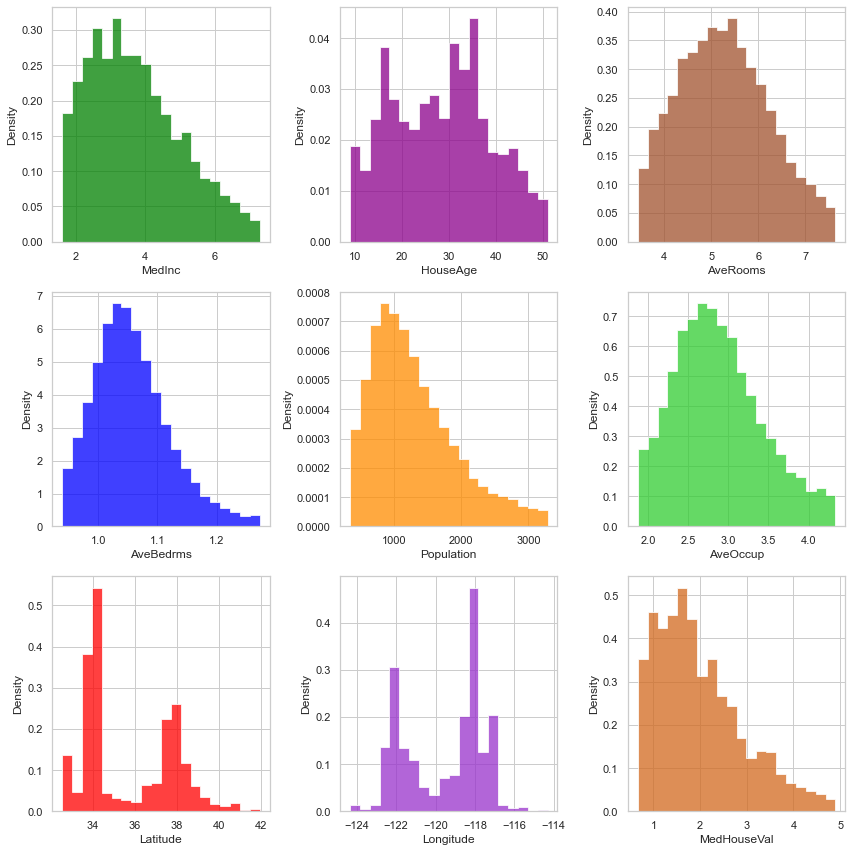

In [8]:
plt.figure(figsize=(12, 12))
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=False, sharey=False, figsize=(12, 12), tight_layout=True)

axs[0,0].hist(prep_serie(df,'MedInc'), 20, density=True, histtype='stepfilled', facecolor='green',alpha=0.75)
axs[0,0].set_xlabel('MedInc')
axs[0,0].set_ylabel('Density')
axs[0,0].grid(True)

axs[0,1].hist(prep_serie(df,'HouseAge'), 20, density=True, histtype='stepfilled', facecolor='darkmagenta',alpha=0.75)
axs[0,1].set_xlabel('HouseAge')
axs[0,1].set_ylabel('Density')
axs[0,1].grid(True)

axs[0,2].hist(prep_serie(df,'AveRooms'), 20, density=True, histtype='stepfilled', facecolor='sienna',alpha=0.75)
axs[0,2].set_xlabel('AveRooms')
axs[0,2].set_ylabel('Density')
axs[0,2].grid(True)

axs[1,0].hist(prep_serie(df,'AveBedrms'), 20, density=True, histtype='stepfilled', facecolor='blue',alpha=0.75)
axs[1,0].set_xlabel('AveBedrms')
axs[1,0].set_ylabel('Density')
axs[1,0].grid(True)

axs[1,1].hist(prep_serie(df,'Population'), 20, density=True, histtype='stepfilled', facecolor='darkorange',alpha=0.75)
axs[1,1].set_xlabel('Population')
axs[1,1].set_ylabel('Density')
axs[1,1].grid(True)

axs[1,2].hist(prep_serie(df,'AveOccup'), 20, density=True, histtype='stepfilled', facecolor='limegreen',alpha=0.75)
axs[1,2].set_xlabel('AveOccup')
axs[1,2].set_ylabel('Density')
axs[1,2].grid(True)

axs[2,0].hist(df['Latitude'], 20, density=True, histtype='stepfilled', facecolor='red',alpha=0.75)
axs[2,0].set_xlabel('Latitude')
axs[2,0].set_ylabel('Density')
axs[2,0].grid(True)

axs[2,1].hist(df['Longitude'], 20, density=True, histtype='stepfilled', facecolor='darkorchid',alpha=0.75)
axs[2,1].set_xlabel('Longitude')
axs[2,1].set_ylabel('Density')
axs[2,1].grid(True)

axs[2,2].hist(prep_serie(df,'MedHouseVal'), 20, density=True, histtype='stepfilled', facecolor='chocolate',alpha=0.75)
axs[2,2].set_xlabel('MedHouseVal')
axs[2,2].set_ylabel('Density')
axs[2,2].grid(True)

fig.tight_layout()
plt.show()

In [9]:
model1 = LinearRegression(normalize = True)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
r2_1 = r2_score(y_test,y_pred1)
print(r2_1)

0.575787706032451


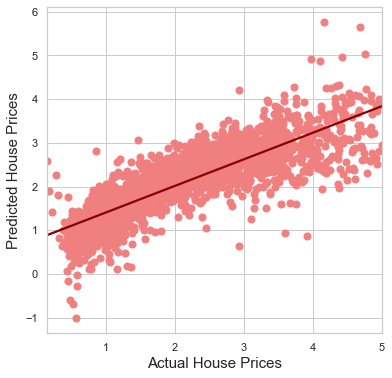

In [10]:
plt.figure(figsize=(6, 6))
sns.regplot(x=y_test, y=y_pred1, x_estimator=np.mean, ci=None, scatter=False, color='darkred')
sns.regplot(x=y_test, y=y_pred1, x_estimator=np.mean, ci=None, fit_reg=False, color='lightcoral')
plt.xlabel('Actual House Prices',fontsize = 15)
plt.ylabel('Predicted House Prices',fontsize = 15)
plt.show()

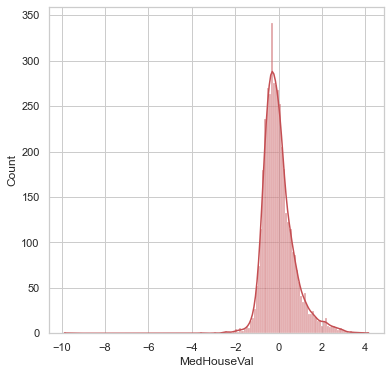

In [11]:
residuals = y_test - y_pred1

plt.figure(figsize=(6, 6))
ax = sns.histplot(data=residuals, kde=True,color='r')
plt.show()

In [12]:
model2 = Lasso(alpha=1,normalize=True,max_iter=1000, tol=0.0001, random_state=42, selection='random')
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
r2_2 = r2_score(y_test,y_pred2)
print(r2_2)

-0.00021908714592466794


In [13]:
model3 = Ridge(alpha=1.0, normalize=True, max_iter=None, tol=0.001, solver='auto', random_state=42)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
r2_3 = r2_score(y_test,y_pred3)
print(r2_3)

0.3878951311562546


In [14]:
model4 = ElasticNet(alpha=1.0, l1_ratio=0.9, normalize=True, max_iter=1000, tol=0.001, random_state=42, selection='random')
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
r2_4 = r2_score(y_test,y_pred4)
print(r2_4)

-0.00021908714592466794


In [15]:
model5 = HuberRegressor(epsilon=100, max_iter=10000, alpha=0.0001, tol=0.001)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
r2_5 = r2_score(y_test,y_pred5)
print(r2_5)

0.5195131122854298


In [16]:
model6 = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000,penalty='l1' ,alpha=0.01, random_state=0, 
                                                    validation_fraction=0.2, early_stopping=True, shuffle=True))
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
r2_6 = r2_score(y_test, y_pred6)
print(r2_6)

0.585382281609019


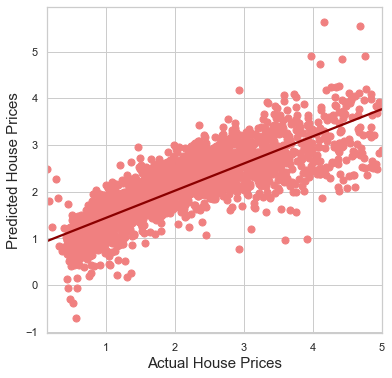

In [17]:
plt.figure(figsize=(6, 6))
sns.regplot(x=y_test, y=y_pred6, x_estimator=np.mean, ci=None, scatter=False, color='darkred')
sns.regplot(x=y_test, y=y_pred6, x_estimator=np.mean, ci=None, fit_reg=False, color='lightcoral')
plt.xlabel('Actual House Prices',fontsize = 15)
plt.ylabel('Predicted House Prices',fontsize = 15)
plt.show()

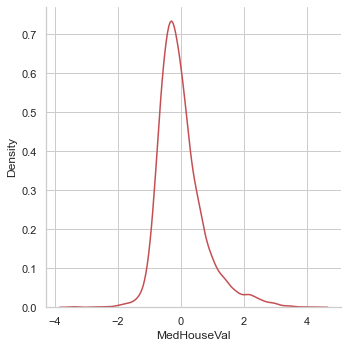

In [18]:
residuals = y_test - y_pred6
sns.displot(residuals, kind="kde",color='r')

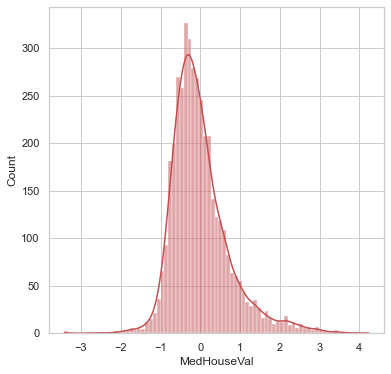

In [19]:
residuals2 = y_test - y_pred6

plt.figure(figsize=(6, 6))
ax = sns.histplot(data=residuals2, kde=True,color='r')
plt.show()

In [20]:
# Best manual fitting
model7 = make_pipeline(StandardScaler(), SGDRegressor(max_iter=10000, 
                                                        penalty='elasticnet', 
                                                        alpha=0.01,
                                                        l1_ratio=0.42,
                                                        eta0=0.01,
                                                        power_t=0.25, 
                                                        early_stopping=True,
                                                        random_state=0, 
                                                        validation_fraction=0.2, 
                                                        shuffle=True))
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
r2_7 = r2_score(y_test, y_pred7)
print(r2_7)

0.585035372165863


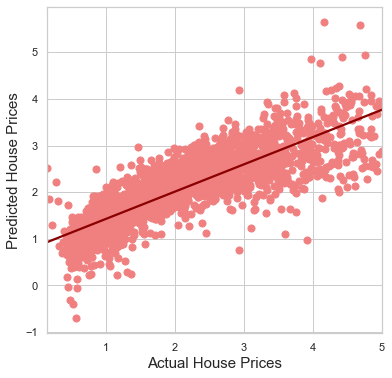

In [21]:
plt.figure(figsize=(6, 6))
sns.regplot(x=y_test, y=y_pred7, x_estimator=np.mean, ci=None, scatter=False, color='darkred')
sns.regplot(x=y_test, y=y_pred7, x_estimator=np.mean, ci=None, fit_reg=False, color='lightcoral')
plt.xlabel('Actual House Prices',fontsize = 15)
plt.ylabel('Predicted House Prices',fontsize = 15)
plt.show()

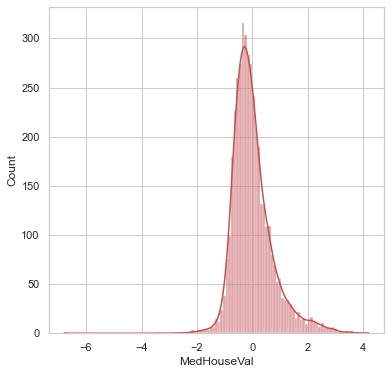

In [22]:
residuals3 = y_test - y_pred7

plt.figure(figsize=(6, 6))
ax = sns.histplot(data=residuals3, kde=True,color='r')
plt.show()